# Prelude

*To provide some data (and context).*

In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# data
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df

TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [3]:
# parameter
xnames = ['TV', 'radio', 'newspaper']
yname = 'sales'

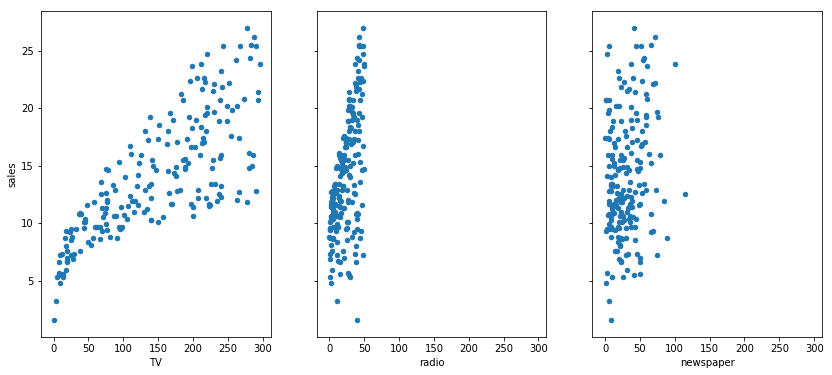

In [4]:
# plot
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True, sharex=True)
for xname, ax in zip(xnames, axs):
    df.plot.scatter(ax=ax, x=xname, y=yname)

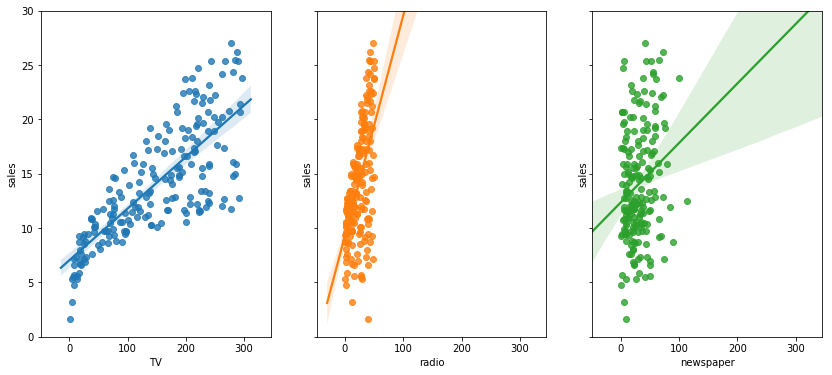

In [5]:
# nicer plot
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True, sharex=True)
for xname, ax in zip(xnames, axs):
    sns.regplot(xname, yname, data=df, ax=ax)
    
_ = axs[0].set_ylim(0, 30)

# Your playground...

*Exercise description in README*

In [6]:
# your code here (or in a module/script)

# Where you are heading...

*For demo purposes only*

In [7]:
from sklearn.linear_model import LinearRegression  # our second machine learning model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X = df[xnames]
y = df[yname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Pipeline([('scale', StandardScaler()), 
                  ('feature', PolynomialFeatures(degree=1)),
                  ('model', LinearRegression(fit_intercept=False, normalize=False))])

# fit
model.fit(X_train, y_train)

# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# compute scores (not part of exercise)
print('Training score (R2):', model.score(X_train, y_train))
print('Test score (R2):', model.score(X_test, y_test))

# compare actual and prediction
df_test = X_test.assign(sales=y_test, sales_pred=y_test_pred)
df_test['actual-pred'] = df_test['sales'] - df_test['sales_pred']

Training score (R2): 0.9055159502227753
Test score (R2): 0.8609466508230368


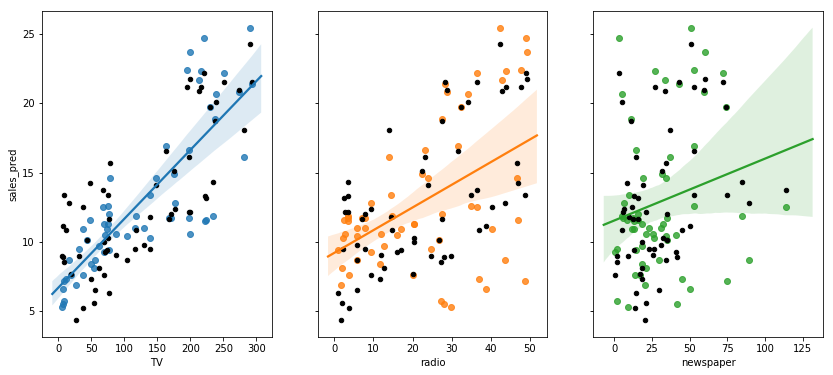

In [8]:
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)

for xname, ax in zip(xnames, axs):
    sns.regplot(xname, 'sales', data=df_test, ax=ax)
    df_test.plot.scatter(ax=ax, x=xname, y='sales_pred', color='k')

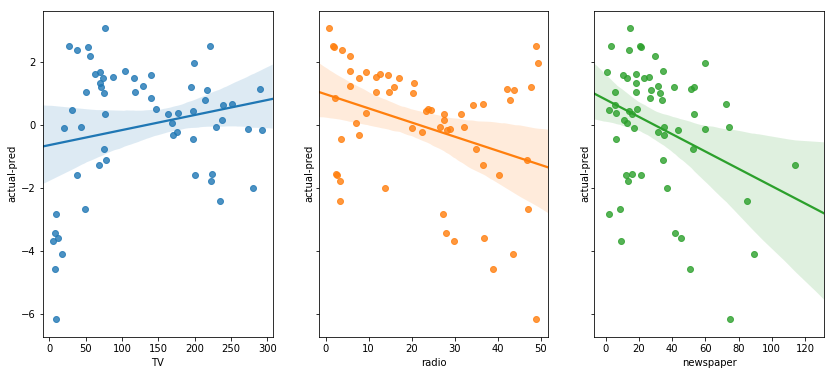

In [9]:
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)

for xname, ax in zip(xnames, axs):
    sns.regplot(xname, 'actual-pred', data=df_test, ax=ax)